## Visualize the trend of Enrollments in U.S over the 1990 to 2016 in different education level

Import libraries and define generic functions

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_graph(x, y, style, xlabel, ylabel, title, label='', legend=None, pointlabel=False):
    plt.plot(x, y, style, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if legend:
      plt.legend()
    
    if pointlabel:
        for a,b in zip(x[::5], y[::5]):
            plt.text(a+0.2, b-0.5, str(b))
        


### Load data from CSV downloaded from  [NCES](https://nces.ed.gov/programs/digest/d18/tables/dt18_105.30.asp)


In [17]:
data = pd.read_csv('data/NCES_Enrollment_Data.csv', dtype={'Year':np.str, 'Total Enrollment':np.int32,
       'Elementary & Secondary enrollment':np.int32,
       'Public elementary and secondary':np.int32,
       'Private elementary and secondary schools':np.int32,
       'Degree-granting postsecondary institutions Total':np.int32,
       'Public post graduation colleges':np.int32, 'Private post graduation colleges':np.int32}, thousands=',')


#### Clean data

Clean 'Year' column as following for example

    1869-70 => 1869
    Fall 1959 => 1959

    And conver year column in integer


In [19]:
data['Year'] = data['Year'].replace(regex=r'(Fall )()', value='')
data['Year'] = data['Year'].replace(regex=r'()(-)(\d{2})*', value='')
data['Year'] = pd.to_numeric(data['Year'])


### Show total enrollment data from 1990-2016

We are normalizing the values by dividing all values by its average over the years to compare the trends over different types of education.

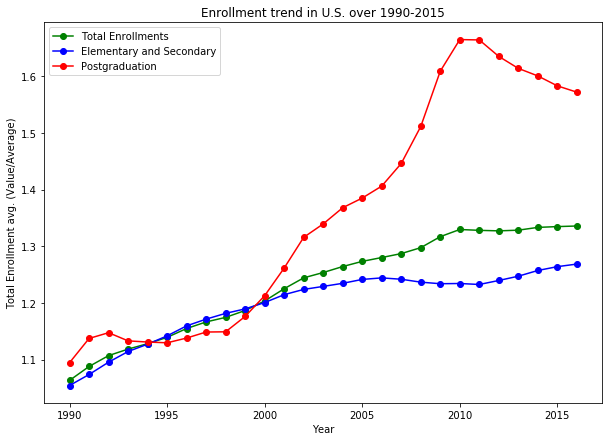

In [20]:
x = data['Year'][12:].values
y = data['Total Enrollment'][12:].div(data['Total Enrollment'].mean()).values
y1 = data['Elementary & Secondary enrollment'][12:].div(data['Elementary & Secondary enrollment'].mean()).values
y2 = data['Degree-granting postsecondary institutions Total'][12:].div(data['Degree-granting postsecondary institutions Total'].mean()).values

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Total Enrollment avg.", "Enrollment trend in U.S.",label="Total Enrollments")
# plt.show()
# fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y1, '-ob', "Year", "Total Enrollment avg.", "Enrollment trend in U.S.", label="Elementary and Secondary")
# plt.show()
# fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y2, '-or', "Year", "Total Enrollment avg. (Value/Average)", "Enrollment trend in U.S. over 1990-2015", label="Postgraduation", legend=True)
plt.show()


### Comapre enrollment growth over the years between postgraduation and secodary graduation


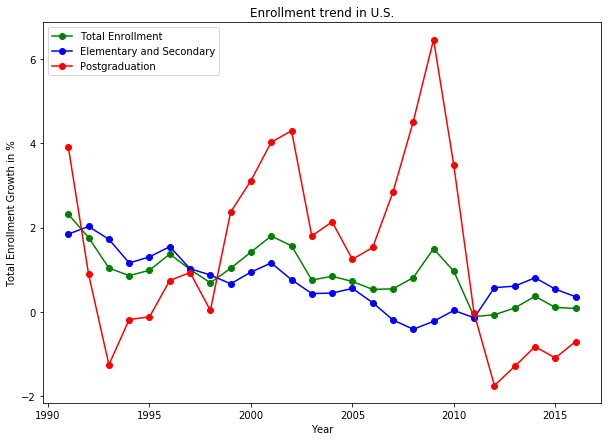

In [21]:
x = data['Year'][13:].values
y = data['Total Enrollment'].pct_change()[13:].mul(100).values
y1 = data['Elementary & Secondary enrollment'].pct_change()[13:].mul(100).values
y2 = data['Degree-granting postsecondary institutions Total'].pct_change()[13:].mul(100).values

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Total Enrollment Growth in %", "Enrollment trend in U.S.", label='Total Enrollment')
plot_graph(x, y1, '-ob', "Year", "Total Enrollment Growth in %", "Enrollment trend in U.S.",
          label="Elementary and Secondary")
plot_graph(x, y2, '-or', "Year", "Total Enrollment Growth in %", "Enrollment trend in U.S.",
          label="Postgraduation", legend=True)

plt.show()


## Graudate program fees over a period

As shown in graph below, the growth rate of graduate program fees over a time is even higher than growth percentage rate of inflation in U.S

In [40]:
data = pd.read_csv('data/NCES_graduate_fees.csv').apply(pd.to_numeric)
inflation = pd.read_csv('data/inflation_rate.csv')
data


,Year,Total,Public Institutions,Private Institutions,PI Profit,PI Non-profit,PB 25Percentile,PB Median,PB 75Percentile,NP 25Percentile,NP Median,NP 75Percentile
0,1999,8069,4042,13821,14123,9611,2640,3637,5163,7998,12870,20487
1,2000,8429,4243,14420,14457,13229,2931,3822,5347,8276,13200,21369
2,2001,8857,4496,15165,15232,13414,3226,4119,5596,8583,14157,22054
3,2002,9226,4842,14983,15676,9644,3395,4452,5927,8690,14140,22700
4,2003,10312,5544,16209,16807,12542,3795,5103,7063,9072,15030,25600
5,2004,11004,6080,16751,17551,13133,4236,5663,7616,9300,16060,26140
6,2005,11621,6493,17244,18171,13432,4608,6209,7977,9745,16222,26958
7,2006,12312,6894,18108,19033,14421,4909,6594,8341,10346,17057,29118
8,2007,13002,7415,18878,19896,14713,5176,6990,9288,10705,17647,30247
9,2008,13647,7999,19230,20485,14418,5612,7376,9912,11290,18270,30514


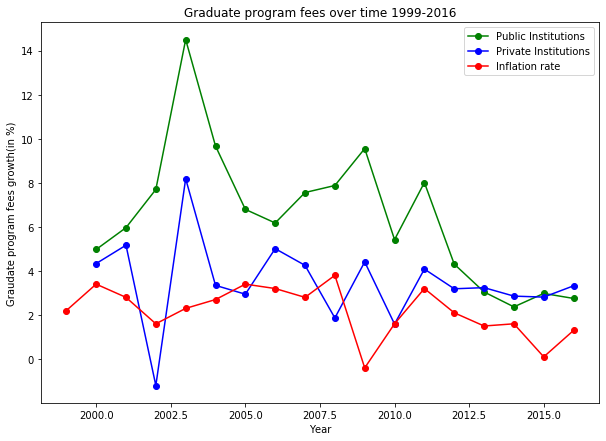

In [41]:
# TODO: Fix the range of x axis, i.e. 2007.5???
x = data['Year'].values
y = data['Public Institutions'].pct_change().mul(100).values
y1 = data['Private Institutions'].pct_change().mul(100).values
y2 = inflation['Inflation'].values  # Already percentage value

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Graudate program fees growth(in %)", "Graduate program fees over time 1999-2016", label='Public Institutions')
plot_graph(x, y1, '-ob', "Year", "Graudate program fees growth(in %)", "Graduate program fees over time 1999-2016", label='Private Institutions')
plot_graph(x, y2, '-or', "Year", "Graudate program fees growth(in %)", "Graduate program fees over time 1999-2016", label='Inflation rate')
plt.legend()


## The education loan by students over a time for higher education in U.S


As shown in graph below, between the period of 2000-2016 almost 50% of total students pursuing higher education in any major or university had student/education loan at the time of their graduation. And the trend of education loans for higher education in students in increasing over a time with a 1-4% a year. 

This shows that as the number of students enrolling in graduate courses increased each year, around 50% of those students take loans to sponsor their higher study each year. Therefore, the number of students taking loans each year for higher programs is increasing. 

The second graph shows us that the amount of loan taken by students to fund their higher studies is increasing over a time, which is obvious now considering we have the insight into the growth of tution fees for graduate courses. As the expenses of higher studies increases, the amount of loans taken by students also increases over a time. 

In [44]:
data = pd.read_csv('data/NCES_student_loan.csv').apply(pd.to_numeric)
data

,Year,Percent of graduate degree completers with student loan debt,Average cumulative amount owed
0,2000,44.6,33300
1,2004,54.6,39500
2,2008,54.6,43700
3,2012,58.6,59400
4,2016,54.2,71000


Text(0.5, 1.0, 'Average cumulative amount owed (in $)')

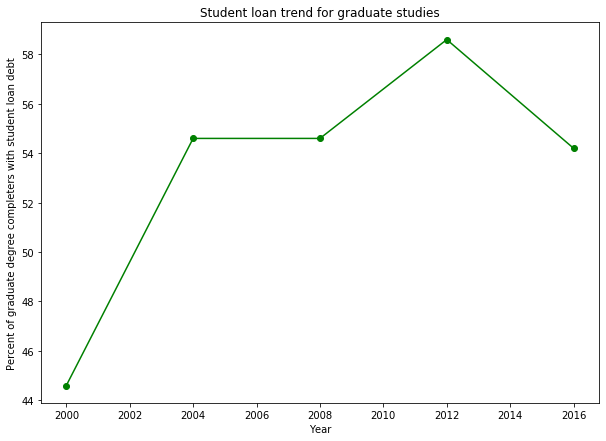

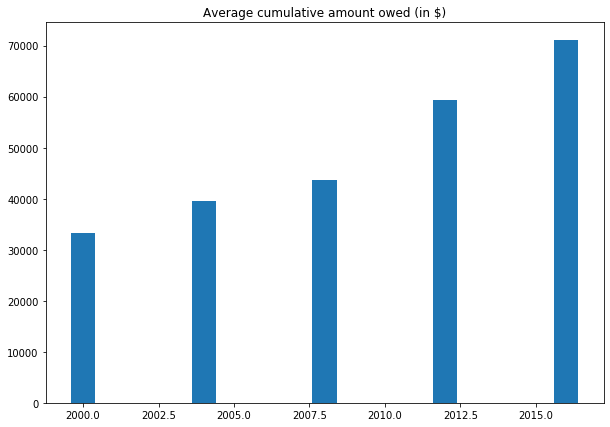

In [48]:
x = data['Year'].values
y = data['Percent of graduate degree completers with student loan debt'].values
y1 = data['Average cumulative amount owed'].values

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Percent of graduate degree completers with student loan debt", "Student loan trend for graduate studies")

# TODO: Fix the range of x axis here as well
fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plt.bar(x, y1)
plt.title("Average cumulative amount owed (in $)")
